In [1]:
import os
print(os.getcwd())


C:\Users\Rijesh


In [2]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot


In [3]:
# Path file to python 3.11 (3.11 
import sys
print(sys.executable)


C:\Users\Rijesh\AppData\Local\Programs\Python\Python311\python.exe


In [4]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm

# TensorFlow Libraries
from tensorflow import keras
from tensorflow.keras import layers, models
from keras_preprocessing.image import ImageDataGenerator  # keras-preprocessing is installed
from tensorflow.keras.layers import Dense, Dropout  # Using tensorflow.keras directly
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3  # ✅ Inception Net v3
from tensorflow.keras import Model
from tensorflow.keras.layers import Normalization, Rescaling, Resizing  # ✅ Updated import

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [5]:
import urllib.request

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
urllib.request.urlretrieve(url, "helper_functions.py")


('helper_functions.py', <http.client.HTTPMessage at 0x1e71e818ed0>)

In [6]:
import requests

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"
response = requests.get(url)

# Save the file in the current working directory
with open("helper_functions.py", "wb") as file:
    file.write(response.content)

print("Download complete!")


Download complete!


In [7]:
BATCH_SIZE = 32
IMAGE_SIZE = (299, 299)  # Match InceptionV3 input size


In [8]:
dataset = "C:\\Vs Code\\SDG\\Thermal Image Dataset\\Dataset Organized"
walk_through_dir(dataset)


There are 2 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized'.
There are 6 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test'.
There are 0 directories and 14 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\Blast'.
There are 0 directories and 44 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\BLB'.
There are 0 directories and 19 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\healthy'.
There are 0 directories and 24 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\hispa'.
There are 0 directories and 7 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\leaf folder'.
There are 0 directories and 16 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Test\leaf spot'.
There are 6 directories and 0 images in 'C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized\Train'.
There are 0 directories an

In [9]:
from pathlib import Path
import os
import pandas as pd

# Define your dataset path correctly
dataset_path = Path(r"C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized")  

# Get file paths for images in both Train and Test directories
filepaths = list(dataset_path.glob(r'**/*.JPG')) + \
            list(dataset_path.glob(r'**/*.jpg')) + \
            list(dataset_path.glob(r'**/*.png')) + \
            list(dataset_path.glob(r'**/*.PNG'))

# Extract labels from folder names (parent folder of each image)
labels = [fp.parent.name for fp in filepaths]

# Convert to pandas DataFrame
image_df = pd.DataFrame({"Filepath": filepaths, "Label": labels})

# Convert filepaths to string (needed for some ML libraries)
image_df["Filepath"] = image_df["Filepath"].astype(str)

# Display the first few rows
print(image_df.head())


                                            Filepath  Label
0  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
1  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
2  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
3  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast
4  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  Blast


In [10]:
print(image_df.sample(10))  # Show 10 random samples
print(image_df['Label'].value_counts())  # Count images per category


                                               Filepath        Label
584   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...    leaf spot
174   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...        Blast
766   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...    leaf spot
832   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...          BLB
578   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf folder
113   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...    leaf spot
219   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...          BLB
512   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...        hispa
629   C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...    leaf spot
1002  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      healthy
Label
BLB            440
hispa          284
healthy        200
leaf spot      160
Blast          134
leaf folder     68
Name: count, dtype: int64


# Placing The datas into the dataframe

In [11]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(r"C:\Vs Code\SDG\Thermal Image Dataset\Dataset Organized").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [12]:
image_df

Filepath      Label
0     C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
1     C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
2     C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
3     C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
4     C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...      Blast
...                                                 ...        ...
1281  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
1282  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
1283  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
1284  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot
1285  C:\Vs Code\SDG\Thermal Image Dataset\Dataset O...  leaf spot

[1286 rows x 2 columns]

# Visualizing the Dataset - For verification

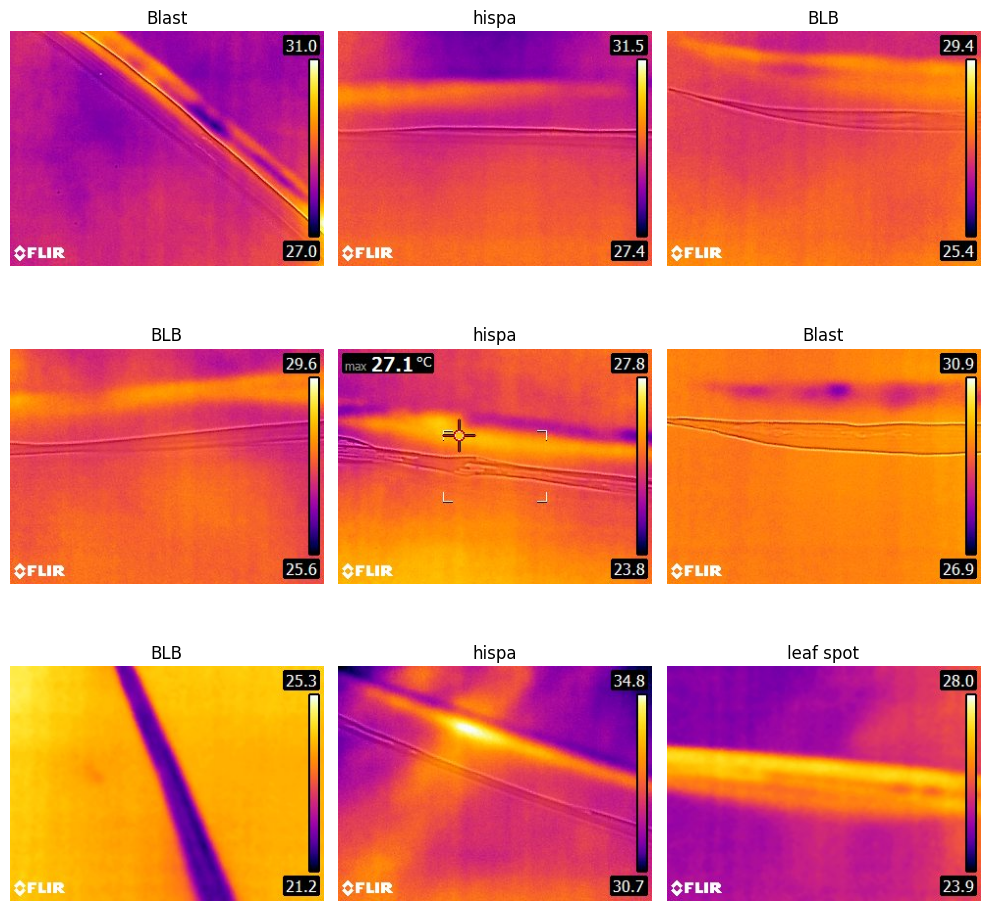

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

# Select a subset of images
sample_images = image_df.sample(9).reset_index(drop=True)  # Select 9 random images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 grid

# Plot images
for i, ax in enumerate(axes.flat):
    img_path = sample_images.iloc[i]['Filepath']  # Get correct file path
    img = Image.open(img_path)  # Open image
    ax.imshow(img)
    ax.set_title(sample_images.iloc[i]['Label'])  # Set title as category label
    ax.axis("off")

plt.tight_layout()
plt.show()


In [14]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [15]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)


In [16]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(299, 299),  # ✅ Change from (224, 224) to (299, 299)
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(299, 299),  # ✅ Change from (224, 224) to (299, 299)
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(299, 299),  # ✅ Change from (224, 224) to (299, 299)
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 823 validated image filenames belonging to 6 classes.
Found 205 validated image filenames belonging to 6 classes.
Found 258 validated image filenames belonging to 6 classes.


# Attention to number of classes and no of denses

In [17]:
from tensorflow.keras import layers

# Resize layer only (InceptionV3 does its own scaling)
resize_layer = tf.keras.Sequential([
    layers.Resizing(299, 299)  # InceptionV3 requires 299x299 images
])


# Training the model - InceptionNetV3

In [18]:
# Load the pretrained InceptionV3 model
pretrained_model = tf.keras.applications.InceptionV3(
    input_shape=(299, 299, 3),  # InceptionV3 requires 299x299 images
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False  # Freeze the base model


In [19]:
print(pretrained_model.summary())  # Prints model architecture


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 149, 149, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 149, 149, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 147, 147, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 147, 147, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 147, 147, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 147, 147, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 147, 147, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 147, 147, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 73, 73, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 73, 73, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 73, 73, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 71, 71, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

None


In [20]:
# Create checkpoint callback
checkpoint_path = r"C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5"

checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,  # Save model weights to this path
    save_weights_only=True,  # Saves only model weights (not the entire model)
    monitor="val_accuracy",  # Track validation accuracy to save the best model
    save_best_only=True,  # Save only when performance improves
    verbose=1  # Print messages when saving
)


In [21]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 6,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

It started 15:49. Ended at 15:53

In [22]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the model using the pretrained InceptionV3 as the base
inputs = layers.Input(shape=(299, 299, 3))  # InceptionV3 input size

# Use the pretrained InceptionV3 model
pretrained_model = tf.keras.applications.InceptionV3(
    input_shape=(299, 299, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False  # Freeze the base model

# Pass inputs through the pretrained model
x = pretrained_model(inputs, training=False)  # Ensure the base model is frozen
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.3)(x)

# Correctly connect the final Dense layer
outputs = layers.Dense(len(image_df['Label'].unique()), activation="softmax")(x)  # Output layer

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with RMSprop optimizer
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,984,742 (87.68 MB)

 Trainable params: 1,181,958 (4.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [23]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=20,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs", "thermal_images_classification"),
        checkpoint_callback,
    ]
)


Saving TensorBoard log files to: training_logs/thermal_images_classification/20250408-233339


C:\Users\Rijesh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2835 - loss: 1.8110    
Epoch 1: val_accuracy improved from -inf to 0.54146, saving model to C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 269s 10s/step - accuracy: 0.2857 - loss: 1.8038 - val_accuracy: 0.5415 - val_loss: 1.0244
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5643 - loss: 1.0764   
Epoch 2: val_accuracy improved from 0.54146 to 0.83415, saving model to C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 268s 10s/step - accuracy: 0.5653 - loss: 1.0745 - val_accuracy: 0.8341 - val_loss: 0.6376
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7154 - loss: 0.8003   
Epoch 3: val_accuracy improved from 0.83415 to 0.88780, saving model to C:\Vs Code\SDG\thermal_images_classification_model_checkpoint.weights.h5
26/26 ━━━━━━━━━━━━━━━━━━━━ 253s 9s/step - accuracy: 0.7162 - loss: 0.7972 -

In [24]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.18538
Test Accuracy: 93.02%


# Visualizing loss curves  

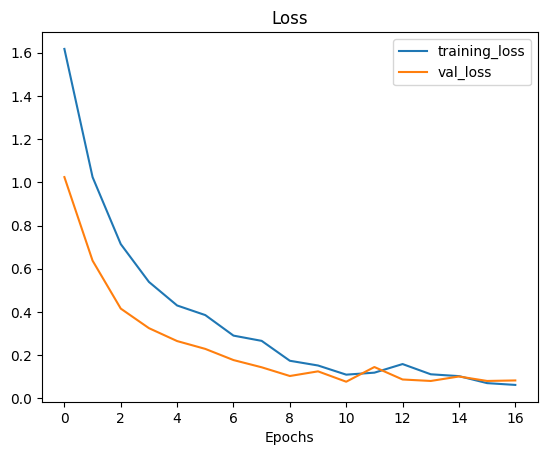

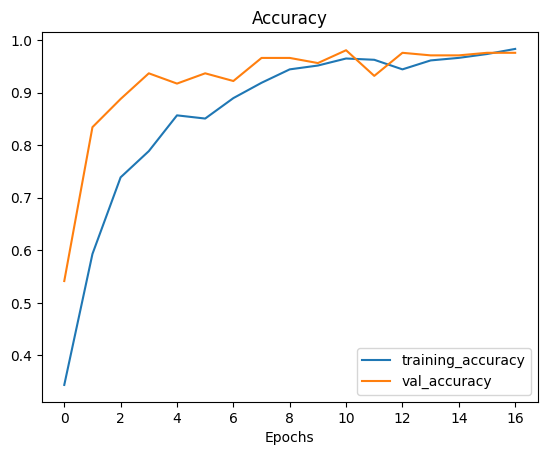

In [25]:
plot_loss_curves(history)

# Make Predictions 

In [26]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step  
The first 5 predictions: ['BLB', 'BLB', 'BLB', 'healthy', 'leaf folder']


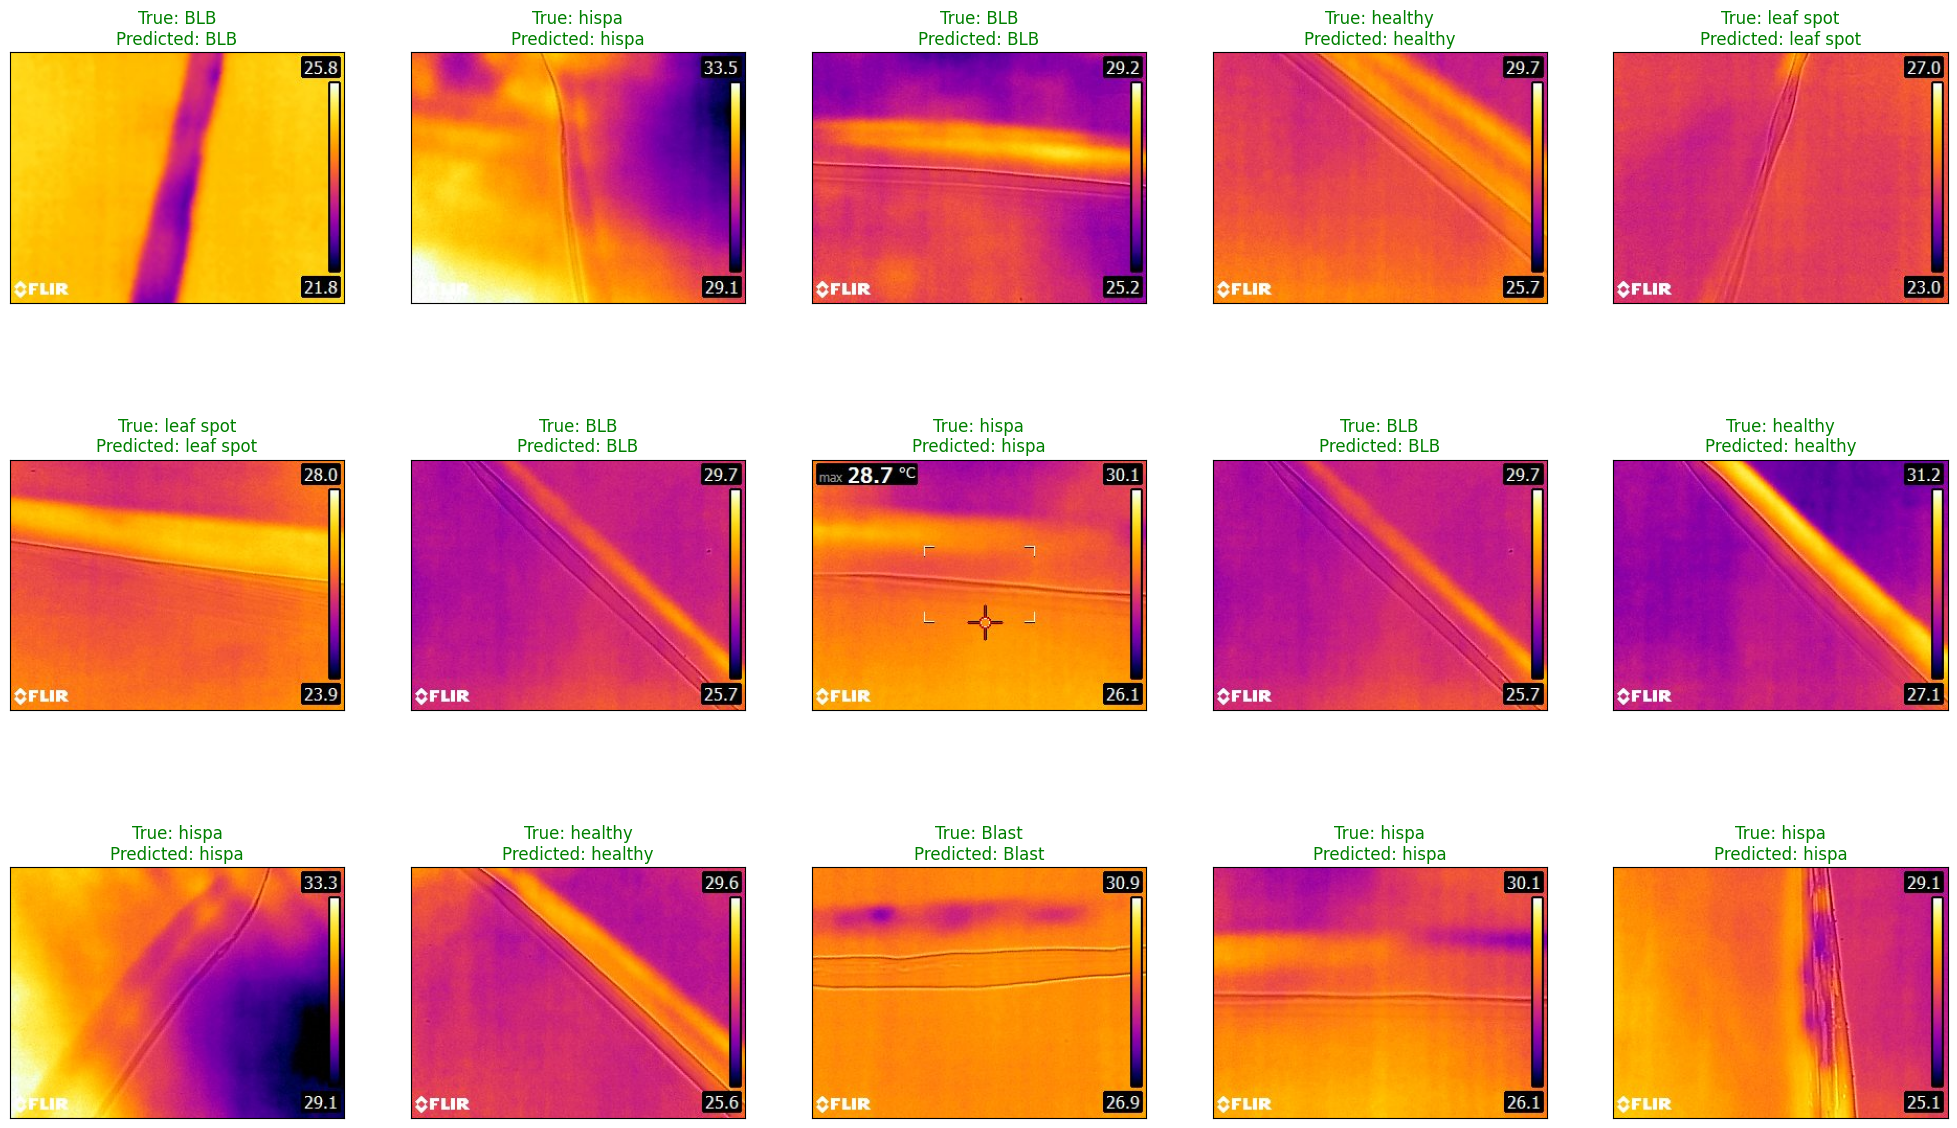

<Figure size 640x480 with 0 Axes>

In [27]:
# Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

# Plotting the Classification Reports and Confusion Matrix

In [28]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BLB       0.90      0.92      0.91        89
       Blast       1.00      0.94      0.97        18
     healthy       0.92      0.90      0.91        50
       hispa       0.93      1.00      0.97        57
 leaf folder       1.00      1.00      1.00        15
   leaf spot       0.96      0.83      0.89        29

    accuracy                           0.93       258
   macro avg       0.95      0.93      0.94       258
weighted avg       0.93      0.93      0.93       258



In [29]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score     support
BLB            0.901099  0.921348  0.911111   89.000000
Blast          1.000000  0.944444  0.971429   18.000000
healthy        0.918367  0.900000  0.909091   50.000000
hispa          0.934426  1.000000  0.966102   57.000000
leaf folder    1.000000  1.000000  1.000000   15.000000
leaf spot      0.960000  0.827586  0.888889   29.000000
accuracy       0.930233  0.930233  0.930233    0.930233
macro avg      0.952315  0.932230  0.941104  258.000000
weighted avg   0.931079  0.930233  0.929747  258.000000

In [30]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 7), text_size=10, norm=False, savefig=False): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
    plt.xticks(rotation=90, fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if norm:
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)
        else:
            plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
    if savefig:
        fig.savefig("confusion_matrix.png")

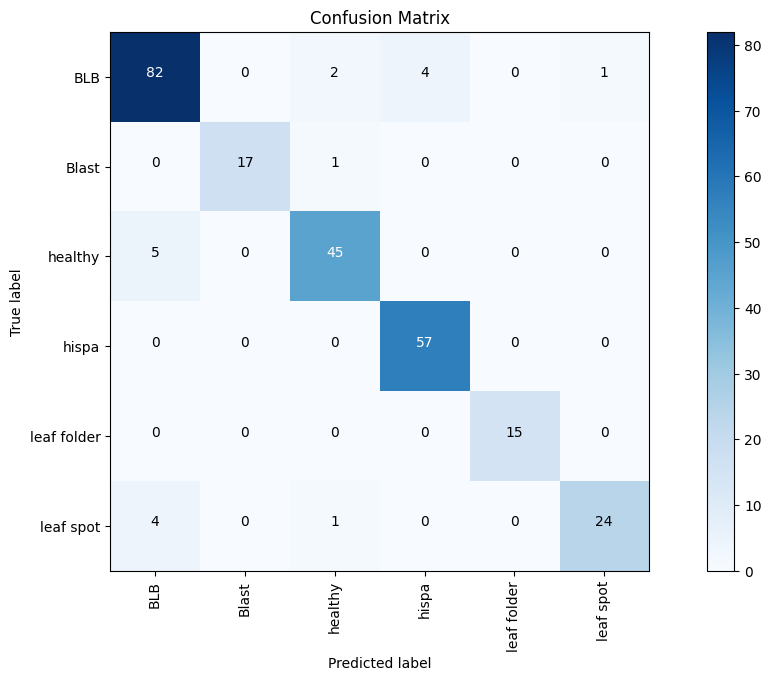

In [31]:
make_confusion_matrix(y_test, pred, list(labels.values()))